In [71]:
from matplotlib import pyplot as plt
from parse_logs import parse_siege_logs, read_log_file
from typing import List

In [72]:
def plot_results(results: List, title: str):
    c_values = [res['c'] for res in results]
    response_times = [res['response_time'] for res in results]
    throughputs = [res['throughput'] for res in results]
    percent_failed_transactions = [res['failed_transactions'] * 100/(res['transactions']+res['failed_transactions']) for res in results]

    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 6), sharex=True)

    # Plot response time on the left
    ax1.plot(c_values, response_times, 'b-o', label='Response Time')
    ax1.set_title('Response Time vs Client requests/second')
    ax1.set_xlabel('Concurrent Users (c)')
    ax1.set_ylabel('Response Time (s)')
    ax1.legend()
    ax1.grid()

    # Plot throughput in the middle
    ax2.plot(c_values, throughputs, 'g-o', label='Throughput')
    ax2.set_title('Throughput vs Client requests/second')
    ax2.set_xlabel('Concurrent Users (c)')
    ax2.set_ylabel('Response Time (s)')
    ax2.legend()
    ax2.grid()

    # Plot throughput on the right
    ax3.plot(c_values, percent_failed_transactions, 'r-o', label='Failed Transactions (%)')
    ax3.set_title('Failed transactions vs Client requests/second')
    ax3.set_xlabel('Failed transactions (%)')
    ax3.set_ylabel('Response Time (s)')
    ax3.legend()
    ax3.grid()

    fig.suptitle(title, fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

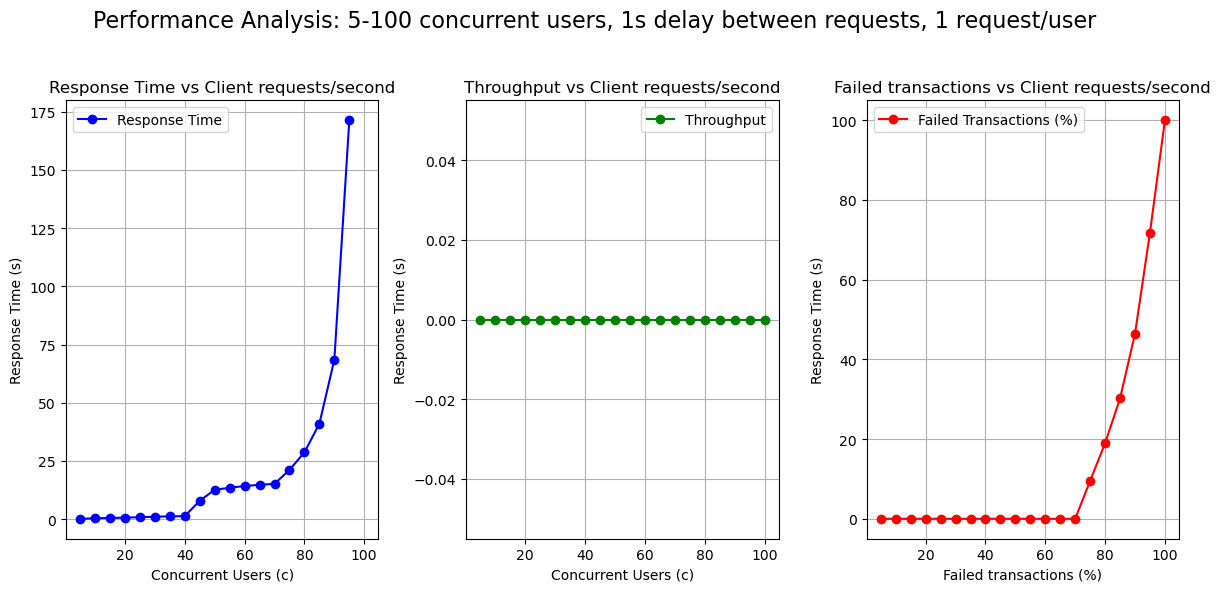

In [73]:
log_file_path = './logs-paas/siege-d1-r1.log'
log_data = read_log_file(log_file_path)
results = parse_siege_logs(log_data)
plot_results(results, 'Performance Analysis: 5-100 concurrent users, 1s delay between requests, 1 request/user')

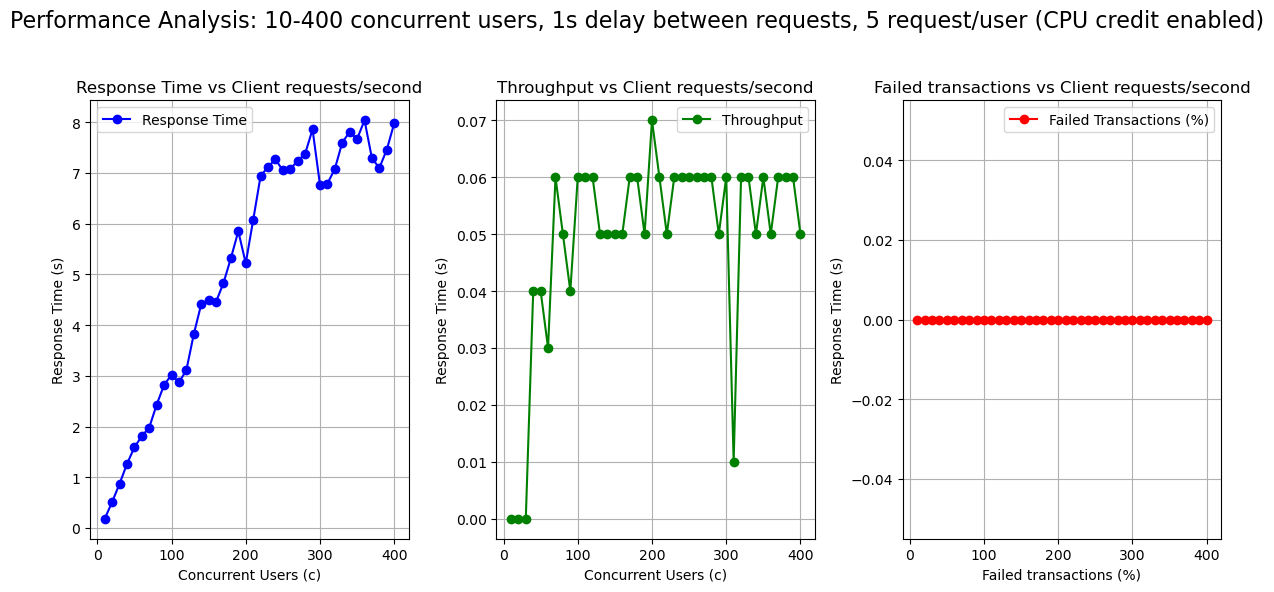

In [74]:
log_file_path = './logs-paas/with-credit/siege-d1-r5.log'
log_data = read_log_file(log_file_path)
results = parse_siege_logs(log_data)
plot_results(results, 'Performance Analysis: 10-400 concurrent users, 1s delay between requests, 5 request/user (CPU credit enabled)')

# After scaling

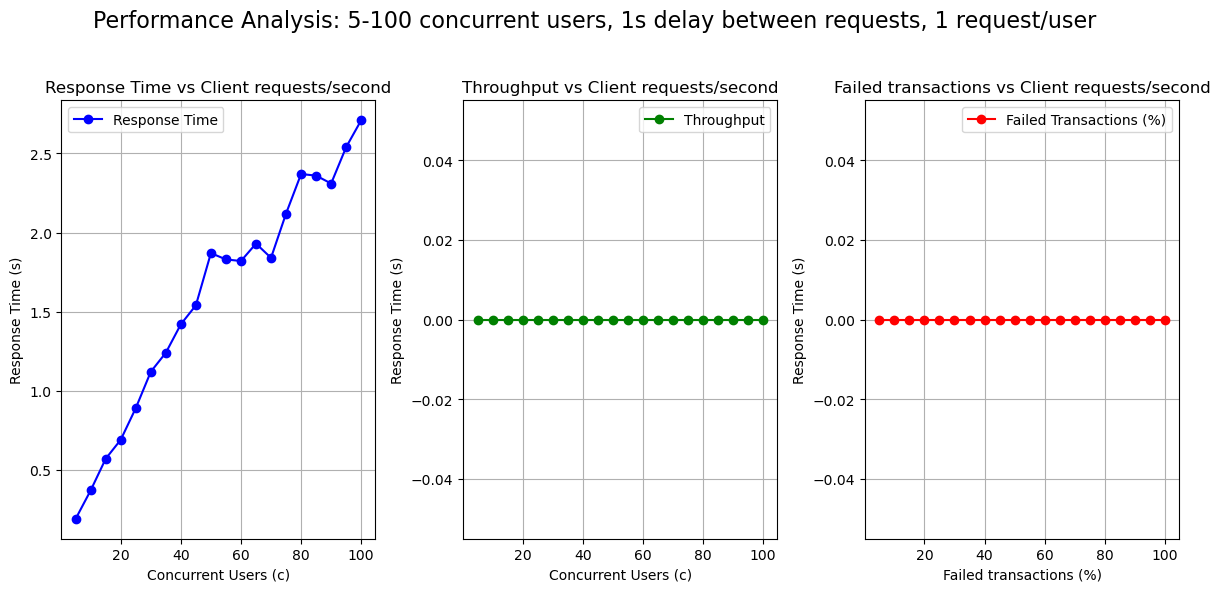

In [75]:
log_file_path = './logs-paas/with-scaling/siege-d1-r1.log'
log_data = read_log_file(log_file_path)
results = parse_siege_logs(log_data)
plot_results(results, 'Performance Analysis: 5-100 concurrent users, 1s delay between requests, 1 request/user')